In [1]:
import numpy as np
import pandas as pd
import os
from timeit import default_timer as timer

base="../../data/clean/"
pd.set_option('display.max_rows', 150)

In [5]:
all_df = pd.read_csv(base+"results.csv")
all_df

,LGA,Assault - domestic violence,Assault - non-domestic violence,Fraud,Sexual Offences,Malicious damage to property,Prohibited weapons offences,Model
0,Albury,544.426300,563.596300,525.256400,216.620300,1315.058000,316.304000,Target
1,Armidale Regional,501.468100,653.228200,841.278700,221.041900,2217.016900,287.024500,Target
2,Ballina,255.712500,321.400100,504.387000,154.835100,795.289300,152.489100,Target
3,Bathurst Regional,438.793100,462.384100,686.498900,200.523700,1184.269500,226.473800,Target
4,Bayside,315.987400,274.138800,728.408500,85.516700,584.667600,108.563800,Target
5,Bega Valley,312.260600,341.719200,318.152400,153.184500,810.110200,153.184500,Target
6,Bellingen,279.221300,263.709000,248.196700,116.342200,604.979400,93.073800,Target
7,Berrigan,174.988300,139.990700,163.322400,81.661200,699.953300,279.981300,Target
8,Blacktown,594.376700,453.118800,821.079900,163.985800,980.750400,148.738000,Target
9,Bland,348.201000,315.039000,281.877000,215.553000,746.144900,381.363000,Target


In [7]:
targets = all_df[all_df.Model=='Target']
targets

,LGA,Assault - domestic violence,Assault - non-domestic violence,Fraud,Sexual Offences,Malicious damage to property,Prohibited weapons offences,Model
0,Albury,544.4263,563.5963,525.2564,216.6203,1315.0580,316.3040,Target
1,Armidale Regional,501.4681,653.2282,841.2787,221.0419,2217.0169,287.0245,Target
2,Ballina,255.7125,321.4001,504.3870,154.8351,795.2893,152.4891,Target
3,Bathurst Regional,438.7931,462.3841,686.4989,200.5237,1184.2695,226.4738,Target
4,Bayside,315.9874,274.1388,728.4085,85.5167,584.6676,108.5638,Target
5,Bega Valley,312.2606,341.7192,318.1524,153.1845,810.1102,153.1845,Target
6,Bellingen,279.2213,263.7090,248.1967,116.3422,604.9794,93.0738,Target
7,Berrigan,174.9883,139.9907,163.3224,81.6612,699.9533,279.9813,Target
8,Blacktown,594.3767,453.1188,821.0799,163.9858,980.7504,148.7380,Target
9,Bland,348.2010,315.0390,281.8770,215.5530,746.1449,381.3630,Target


In [8]:
best_13 = all_df[all_df.Model=='Best 13']
best_13

,LGA,Assault - domestic violence,Assault - non-domestic violence,Fraud,Sexual Offences,Malicious damage to property,Prohibited weapons offences,Model
840,Albury,577.254253,608.566180,571.773190,263.920259,1493.217885,328.349038,Best 13
841,Armidale Regional,576.814446,615.328677,497.956844,259.245783,1495.024957,346.138154,Best 13
842,Ballina,364.081753,354.008232,419.859829,170.870119,784.676769,150.297917,Best 13
843,Bathurst Regional,473.735632,447.923269,585.032108,208.651361,934.918856,209.882678,Best 13
844,Bayside,369.103788,344.127269,784.300305,113.811873,671.770098,110.353288,Best 13
845,Bega Valley,427.534633,329.042526,344.302782,222.900849,835.319482,204.540645,Best 13
846,Bellingen,444.694993,522.661875,470.067696,258.354739,1087.937163,215.851209,Best 13
847,Berrigan,250.946686,279.636045,430.119706,172.319114,783.135434,319.434551,Best 13
848,Blacktown,460.851044,389.614687,856.615163,156.264042,802.974882,143.285114,Best 13
849,Bland,683.813357,451.081801,255.866661,272.968933,1510.215427,518.882599,Best 13


In [9]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

def scatter_plot(y, pred, title):
    fig, ax = plt.subplots()
    ax.scatter(y, pred, edgecolors=(0, 0, 0))
    ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')
    plt.title(title)
    plt.show()

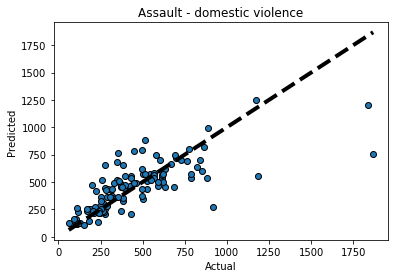

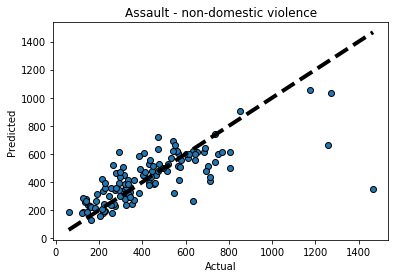

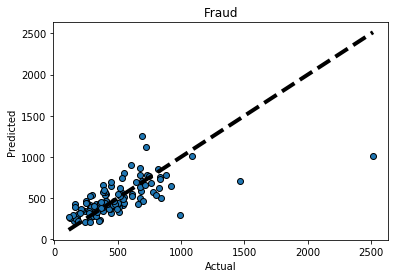

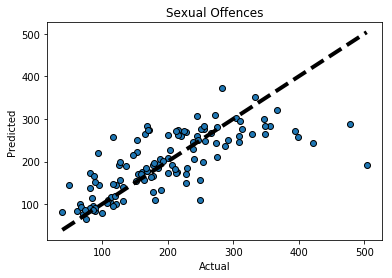

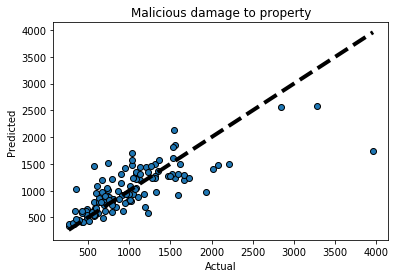

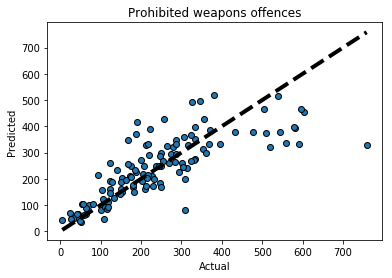

In [11]:
crimes = targets.columns[1:-1]
for crime in crimes:
    scatter_plot(targets[crime],best_13[crime], crime)